# <span style="color: red;">任务的一些基本情况</span>

## <span style="color: blue;">源数据集的基本情况</span>

In [1]:
import torch
from torch import nn
import requests
import zipfile
from pathlib import Path
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision import datasets
from Config import *


data_transform = transforms.Compose([
    transforms.Resize(size=(28, 28)),
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.ToTensor() 
])

train_data = datasets.ImageFolder(root=Config.train_dir, 
                                  transform=data_transform, 
                                  target_transform=None) 
test_data = datasets.ImageFolder(root=Config.test_dir, 
                                 transform=data_transform)

In [2]:
len(train_data),len(test_data)

(60000, 10000)

In [3]:
import os
def walk_through_dir(dir_path):
  num = []
  for dirpath, dirnames, filenames in os.walk(dir_path):
    parts = [part for part in dirpath.split("\\") if part]
    if(len(parts)==6):
      num.append(int(len(filenames)))
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  return num

In [4]:
train_data = walk_through_dir(Config.train_dir)
test_data = walk_through_dir(Config.test_dir)

There are 10 directories and 0 images in 'F:\python\机器学习\SData\train'.
There are 0 directories and 5923 images in 'F:\python\机器学习\SData\train\0'.
There are 0 directories and 6742 images in 'F:\python\机器学习\SData\train\1'.
There are 0 directories and 5958 images in 'F:\python\机器学习\SData\train\2'.
There are 0 directories and 6131 images in 'F:\python\机器学习\SData\train\3'.
There are 0 directories and 5842 images in 'F:\python\机器学习\SData\train\4'.
There are 0 directories and 5421 images in 'F:\python\机器学习\SData\train\5'.
There are 0 directories and 5918 images in 'F:\python\机器学习\SData\train\6'.
There are 0 directories and 6265 images in 'F:\python\机器学习\SData\train\7'.
There are 0 directories and 5851 images in 'F:\python\机器学习\SData\train\8'.
There are 0 directories and 5949 images in 'F:\python\机器学习\SData\train\9'.
There are 10 directories and 0 images in 'F:\python\机器学习\SData\test'.
There are 0 directories and 980 images in 'F:\python\机器学习\SData\test\0'.
There are 0 directories and 1135 ima

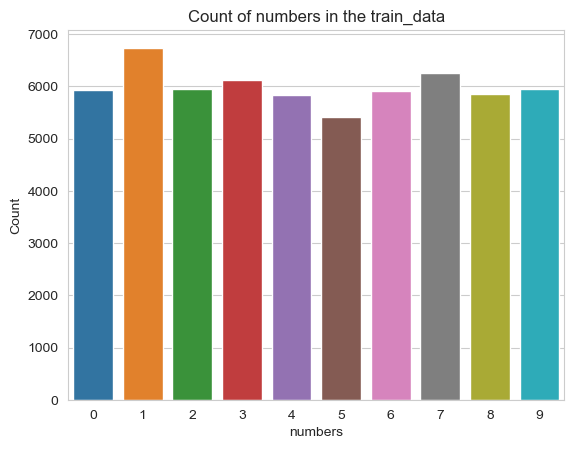

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 

bins = [i for i in range(10)]  # 从0到9

sns.set_style(style="whitegrid")  # 设置图形风格
ax = sns.barplot(x=bins, y=train_data)

ax.set(xlabel='numbers', ylabel='Count')
ax.set_title("Count of numbers in the train_data")

# 显示图形
plt.show()

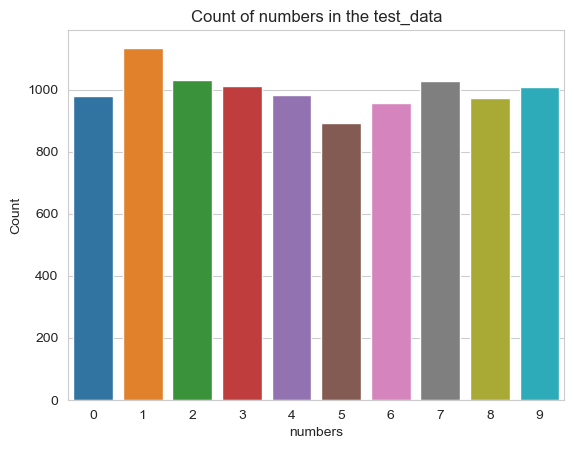

In [6]:
bins = [i for i in range(10)]  # 从0到9

sns.set_style(style="whitegrid")  # 设置图形风格
ax = sns.barplot(x=bins, y=test_data)

ax.set(xlabel='numbers', ylabel='Count')
ax.set_title("Count of numbers in the test_data")

# 显示图形
plt.show()

In [7]:
train_data = datasets.ImageFolder(root=Config.train_dir, 
                                  transform=data_transform, 
                                  target_transform=None) 
test_data = datasets.ImageFolder(root=Config.test_dir, 
                                 transform=data_transform)

### 源数据集图片的基本情况

In [8]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(Path(Config.train_dir).glob("*/*.png"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem


img = Image.open(random_image_path)
channels = img.getbands()
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
print(f"Image channels: {len(channels)}")
img

Random image path: F:\python\机器学习\SData\train\6\mnist_train_9745.png
Image class: 6
Image height: 28
Image width: 28
Image channels: 1


### 图像的基本情况
- size 为 28*28
- channels 为 1（灰度图像）
#### 但是我们通过imagefloader去加载图像，他会默认的把我们这个channels 视为 3

## <span style="color: blue;">目标数据集的基本情况</span>

Random image path: F:\python\机器学习\Data\mnist_m_train\00041905.png
Image class: mnist_m_train
Image height: 32
Image width: 32
Image channels: 3


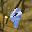

In [9]:
random.seed(42)

image_path_list = list(Path(Config.train_x).glob("*.png"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem


img = Image.open(random_image_path)
channels = img.getbands()
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
print(f"Image channels: {len(channels)}")
img

### 图像的基本情况
- size 为 32*32
- channels 为 3（彩色图像）

## 统计类别的占比情况

In [10]:
from collections import Counter
counts_train = Counter()
counts_test = Counter()
with open(Config.train_y, 'r') as file:
    for line in file:
        number = line.strip().split()[-1]
        number = int(number)
        counts_train[number] += 1
with open(Config.test_y, 'r') as file:
    for line in file:
        number = line.strip().split()[-1]
        number = int(number)
        counts_test[number] += 1
print("在训练集里每个数字出现的情况如下所示")
print(counts_train)
for number, count in counts_train.items():
    print(f"数字 {number} 出现了 {count} 次")
print("在测试集里每个数字出现的情况如下所示")
print(counts_test)
for number, count in counts_test.items():
    print(f"数字 {number} 出现了 {count} 次")

在训练集里每个数字出现的情况如下所示
Counter({1: 6640, 7: 6158, 3: 6028, 2: 5853, 9: 5851, 0: 5825, 6: 5812, 8: 5757, 4: 5746, 5: 5331})
数字 5 出现了 5331 次
数字 0 出现了 5825 次
数字 4 出现了 5746 次
数字 1 出现了 6640 次
数字 9 出现了 5851 次
数字 2 出现了 5853 次
数字 3 出现了 6028 次
数字 6 出现了 5812 次
数字 7 出现了 6158 次
数字 8 出现了 5757 次
在测试集里每个数字出现的情况如下所示
Counter({1: 1016, 2: 933, 9: 919, 7: 914, 3: 908, 4: 890, 8: 880, 0: 878, 6: 856, 5: 807})
数字 7 出现了 914 次
数字 2 出现了 933 次
数字 1 出现了 1016 次
数字 0 出现了 878 次
数字 4 出现了 890 次
数字 9 出现了 919 次
数字 5 出现了 807 次
数字 6 出现了 856 次
数字 3 出现了 908 次
数字 8 出现了 880 次


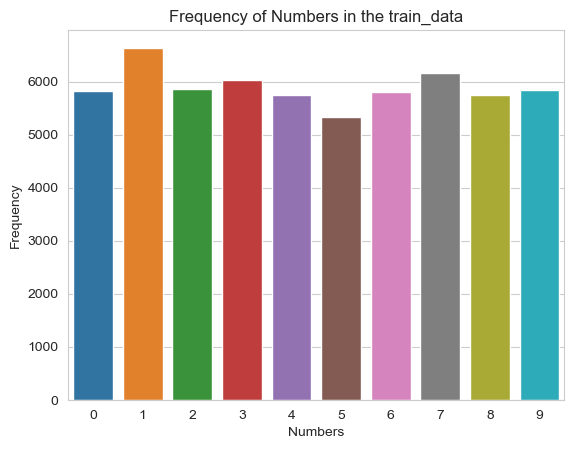

In [11]:
# 图像展示
sorted_counts = sorted(counts_train.items(), key=lambda x: x[1], reverse=True)

numbers, counts = zip(*sorted_counts)
sns.set_style(style="whitegrid")  # 设置图形风格
ax = sns.barplot(x=list(numbers), y=list(counts))
# 绘制柱状图
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.title('Frequency of Numbers in the train_data')
plt.show()

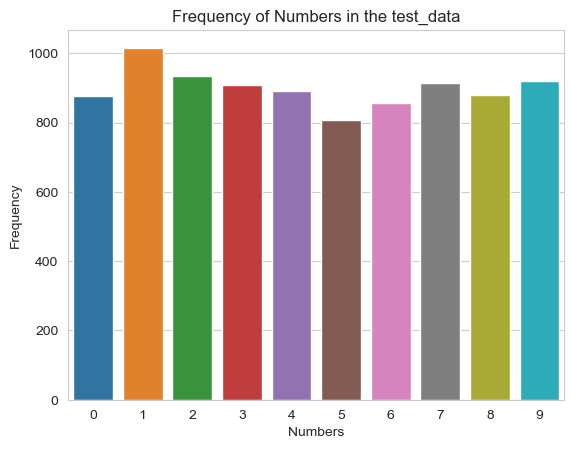

In [12]:
# 图像展示
sorted_counts = sorted(counts_test.items(), key=lambda x: x[1], reverse=True)

numbers, counts = zip(*sorted_counts)
sns.set_style(style="whitegrid")  # 设置图形风格
ax = sns.barplot(x=list(numbers), y=list(counts))
# 绘制柱状图
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.title('Frequency of Numbers in the test_data')
plt.show()

## <span style="color: blue;">模型结构的基本情况</span>

### Alexnet

In [14]:
from torchinfo import summary
from models import *
model_1 = AlexNet()
summary(model=model_1, 
        input_size=(32, 1, 28, 28), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
AlexNet (AlexNet)                        [32, 1, 28, 28]      [32, 10]             --                   True
├─Sequential (layer)                     [32, 1, 28, 28]      [32, 256, 3, 3]      --                   True
│    └─Conv2d (0)                        [32, 1, 28, 28]      [32, 32, 28, 28]     320                  True
│    └─ReLU (1)                          [32, 32, 28, 28]     [32, 32, 28, 28]     --                   --
│    └─MaxPool2d (2)                     [32, 32, 28, 28]     [32, 32, 14, 14]     --                   --
│    └─Conv2d (3)                        [32, 32, 14, 14]     [32, 64, 14, 14]     18,496               True
│    └─ReLU (4)                          [32, 64, 14, 14]     [32, 64, 14, 14]     --                   --
│    └─MaxPool2d (5)                     [32, 64, 14, 14]     [32, 64, 7, 7]       --                   --
│    └─Conv2d (6)     

## ResNet18

In [15]:
model_2= Resnet18(BasicBlock)
summary(model=model_2, 
        input_size=(32, 1, 28, 28), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
Resnet18 (Resnet18)                      [32, 1, 28, 28]      [32, 10]             --                   True
├─Sequential (conv1)                     [32, 1, 28, 28]      [32, 64, 28, 28]     --                   True
│    └─Conv2d (0)                        [32, 1, 28, 28]      [32, 64, 28, 28]     576                  True
│    └─BatchNorm2d (1)                   [32, 64, 28, 28]     [32, 64, 28, 28]     128                  True
├─Sequential (conv2)                     [32, 64, 28, 28]     [32, 64, 28, 28]     --                   True
│    └─BasicBlock (0)                    [32, 64, 28, 28]     [32, 64, 28, 28]     --                   True
│    │    └─Sequential (layer)           [32, 64, 28, 28]     [32, 64, 28, 28]     73,984               True
│    │    └─Sequential (shortcut)        [32, 64, 28, 28]     [32, 64, 28, 28]     --                   --
│    └─BasicBloc

# <span style="color: blue;">其他</span>

### 尝试对彩色图片进行灰度化

In [16]:
target_transform = transforms.Compose([
    transforms.Resize(size=(28, 28)),
    transforms.Grayscale(num_output_channels = 1),
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomInvert(p=0.5), 
    transforms.ToTensor() 
])

In [17]:
from create_target_dataset import *
target_train_dataset = mydataset(Config.train_x,Config.train_y,target_transform)
target_test_dataset = mydataset(Config.test_x,Config.test_y,target_transform)

59001
9001


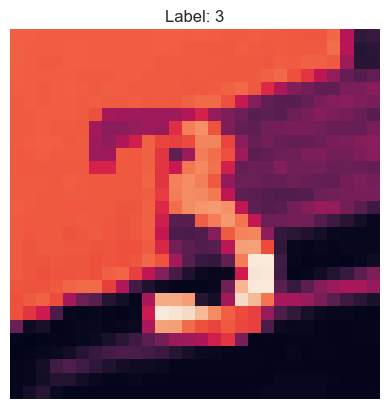

In [18]:
# 画一个显示效果
x,y = target_train_dataset[8888][0],target_train_dataset[8888][1]
x = x.permute(1, 2, 0)
# 使用 matplotlib 显示图像
plt.imshow(x)
plt.title(f'Label: {y}')
plt.axis('off')  # 不显示坐标轴
plt.show()

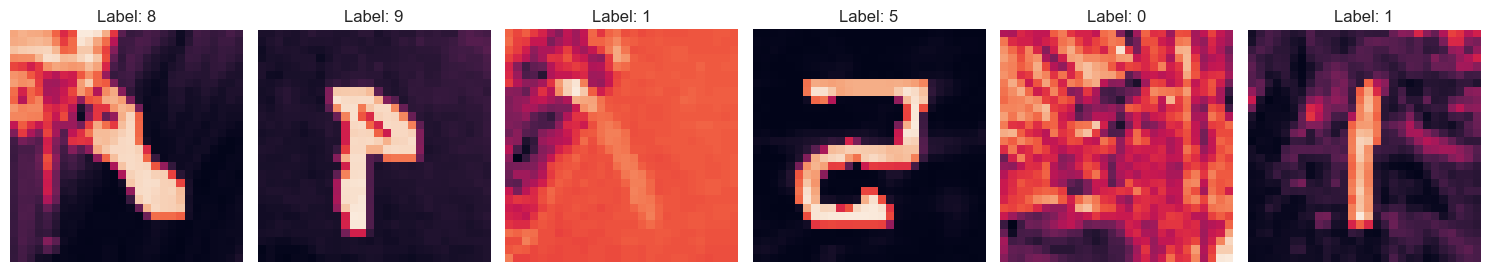

In [19]:
import matplotlib.pyplot as plt
import numpy as np
dataset_size = len(target_train_dataset)

random_indices = np.random.choice(dataset_size, 6, replace=False)

fig, axs = plt.subplots(1, 6, figsize=(15, 3)) 

for i, idx in enumerate(random_indices):
    x, y = target_train_dataset[idx][0], target_train_dataset[idx][1]
    x = x.permute(1, 2, 0) if isinstance(x, torch.Tensor) else x  

    axs[i].imshow(x)
    axs[i].set_title(f'Label: {y}')
    axs[i].axis('off') 

plt.tight_layout()
plt.show()

## 把灰度图片进行彩色化

In [21]:
source_transform = transforms.Compose([
    transforms.Resize(size=(28, 28)),
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomInvert(p=0.5), # 数据增强随机翻转
    transforms.ToTensor() 
])

In [22]:
source_train_data = datasets.ImageFolder(root=Config.train_dir, 
                                  transform=source_transform, 
                                  target_transform=None) 
source_test_data = datasets.ImageFolder(root=Config.test_dir, 
                                 transform=source_transform)
source_train_dataloader = DataLoader(source_train_data,Config.batch_size,shuffle=True)
source_test_dataloader = DataLoader(source_test_data,Config.batch_size,shuffle=True)

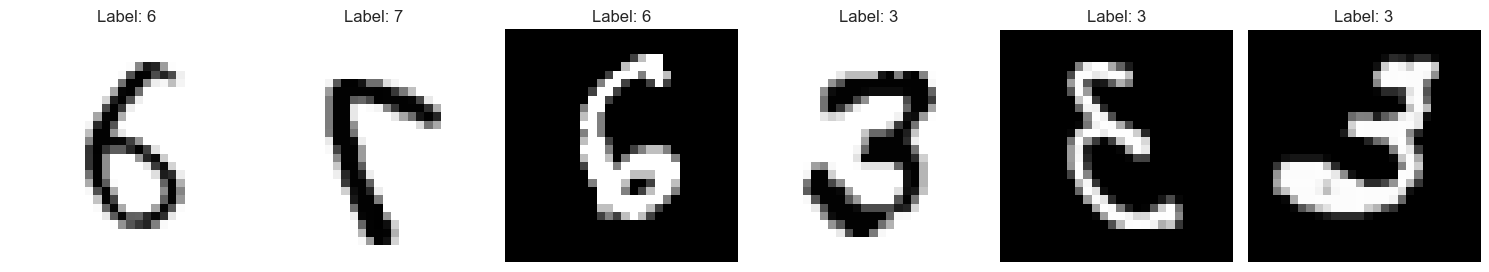

In [25]:
import matplotlib.pyplot as plt
import numpy as np
dataset_size = len(source_train_data)

random_indices = np.random.choice(dataset_size, 6, replace=False)

fig, axs = plt.subplots(1, 6, figsize=(15, 3)) 

for i, idx in enumerate(random_indices):
    x, y = source_train_data[idx][0],source_train_data[idx][1]
    x = x.permute(1, 2, 0) if isinstance(x, torch.Tensor) else x  

    axs[i].imshow(x)
    axs[i].set_title(f'Label: {y}')
    axs[i].axis('off') 

plt.tight_layout()
plt.show()

### 发现灰色变成彩色后的效果还是会更好一点

## 一些损失下降的图片

#### 源数据训练集上的损失下降情况

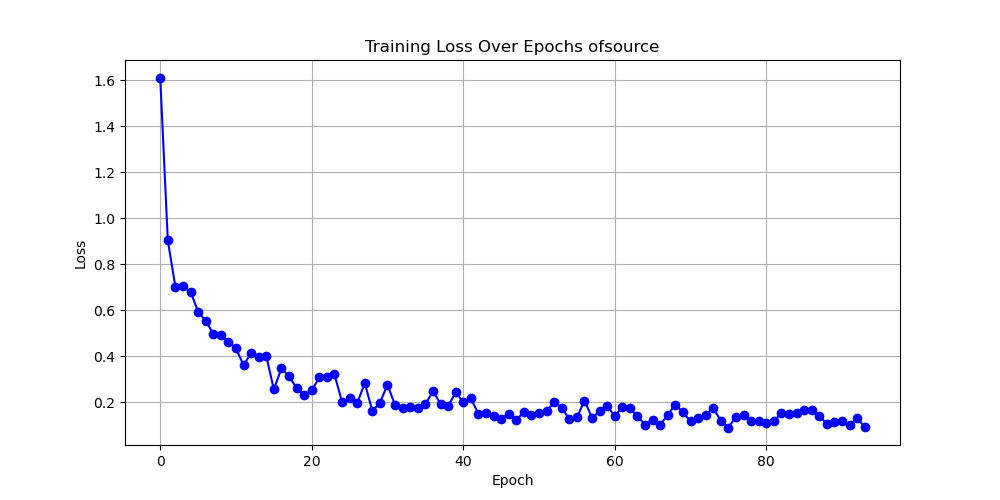